# Longitudinal Contours

Versions:  
v1: Used for initial polar export of cell 4  
v2: Explore other cells, adjust export formatting  


Load cell 4 and create longitudinal contours. Output special set of contours which radiate interpolations consistently / concentrically form a single point. 

In [107]:
import importlib
import confocal
importlib.reload(confocal)

import glob, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import imageio
import re
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
from scipy.interpolate import interp2d,RegularGridInterpolator
from random import random
from tqdm import tqdm
from scipy.interpolate import interp1d

from itertools import accumulate
from skimage.measure import find_contours
from scipy.spatial import ConvexHull
import time

import itertools

52
Intensity_Z000 (1988, 1988, 3)
Intensity_Z001 (1988, 1988, 3)
Intensity_Z002 (1988, 1988, 3)
Intensity_Z003 (1988, 1988, 3)
Intensity_Z004 (1988, 1988, 3)
Intensity_Z005 (1988, 1988, 3)
Intensity_Z006 (1988, 1988, 3)
Intensity_Z007 (1988, 1988, 3)
Intensity_Z008 (1988, 1988, 3)
Intensity_Z009 (1988, 1988, 3)
Intensity_Z010 (1988, 1988, 3)
Intensity_Z011 (1988, 1988, 3)
Intensity_Z012 (1988, 1988, 3)
Intensity_Z013 (1988, 1988, 3)
Intensity_Z014 (1988, 1988, 3)
Intensity_Z015 (1988, 1988, 3)
Intensity_Z016 (1988, 1988, 3)
Intensity_Z017 (1988, 1988, 3)
Intensity_Z018 (1988, 1988, 3)
Intensity_Z019 (1988, 1988, 3)
Intensity_Z020 (1988, 1988, 3)
Intensity_Z021 (1988, 1988, 3)
Intensity_Z022 (1988, 1988, 3)
Intensity_Z023 (1988, 1988, 3)
Intensity_Z024 (1988, 1988, 3)
Intensity_Z025 (1988, 1988, 3)
Intensity_Z026 (1988, 1988, 3)
Intensity_Z027 (1988, 1988, 3)
Intensity_Z028 (1988, 1988, 3)
Intensity_Z029 (1988, 1988, 3)
Intensity_Z030 (1988, 1988, 3)
Intensity_Z031 (1988, 1988, 3)
Inten

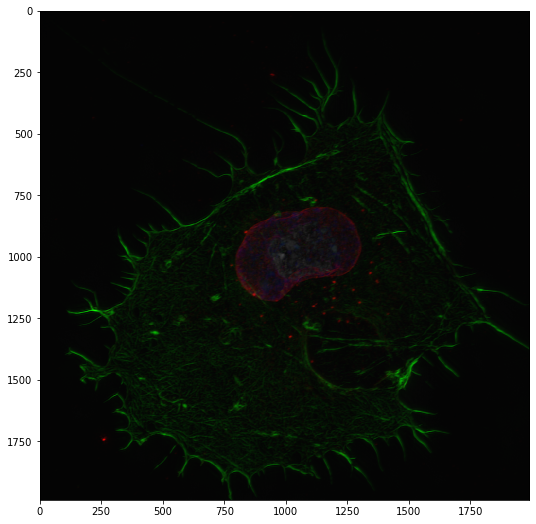

Cell 1


In [3]:
cell_num = celln = 1
_ = cell_num

base_dir = 'datasets/SR_HUVEC1/'
specific_ds = 'HUVEC Cell %d/' % _
target_dir = os.path.join(base_dir, specific_ds, 'Intensity.png.export/')
source_folder = os.path.join(base_dir, specific_ds)

# os.mkdir(source_)

#     print('isfile', os.path.isfile(os.path.join(source_folder,'HUVEC Cell 1.ome.tif')))
if True:
    confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Cell %d.ome.tif' % _, n_channels=4, keep3=[0,2,3]) # 0, 1, 3
    # 1: 0 2 3
    # 2: 0 2 3 

globular_full = os.path.join(base_dir, specific_ds,
                             'Intensity.png.export/Intensity*.png')  # 'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
print(len(glob.glob(globular_full)))
destdir = os.path.join(base_dir, specific_ds)
os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
desc = 'srh1_%d' % _
if True:
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir,
                            filedesc=desc, as_colors=[0, 1, 2])
    print('Cell %d' % _)
plt.show()    

Case: SRH1_1
Raw png count: datasets/SR_HUVEC1/HUVEC Cell 1/Intensity.png.export/Intensity_Z*.png 61
Full images n: 61
cwd: /Users/asears/work/confocal
Found 61 files, ie: datasets/SR_HUVEC1/HUVEC Cell 1/Intensity.png.export/Intensity_Z058.png
Results: 61 files w/ indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 1/objects/Nucleus_1.png
Results: 1 files w/ indices: [1]
cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 1/objects/Cytoplasm_1.png
Results: 1 files w/ indices: [1]


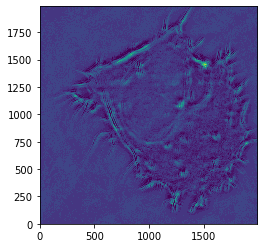

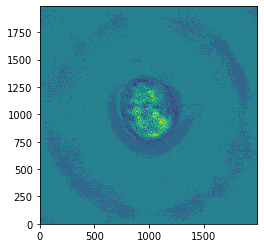

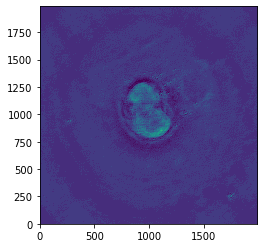

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/asears/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-8af897f60c53>", line 41, in <module>
    cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
  File "/Users/asears/work/confocal/confocal.py", line 721, in create_cropped
    self.data[cropped_name] = do_crop(data, window=window)
  File "/Users/asears/work/confocal/confocal.py", line 696, in do_crop
    data = item['fxn']((xx, yy, zz))
  File "/Users/asears/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py", line 2493, in __call__
    out_of_bounds)
  File "/Users/asears/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py", line 2514, in _evaluate_linear
    weight *= np.where(ei == i, 1 - yi, yi)
  File "<_

KeyboardInterrupt: 

In [4]:
celln = 1
case = 'SRH1_%d' % celln

example_z = 15
print('Case:', case)

base_folder = 'datasets/SR_HUVEC1/HUVEC Cell %d/' % celln

objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'

globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
print('Raw png count:', globular_full, len(glob.glob(globular_full)))
destdir = base_folder
desc = 'srh1_%d' % celln
# 'index_re': r'_Z(\d+)',
o = dict(
    globular_full=globular_full,
    # reuse segmentation
    globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
    globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
    source_folder = base_folder, # diagnostics folder will be created here

    nuc_color=0, # 2 0 2
    cyto_color=1,
    other_color=2,    
)

cs1 = confocal.gen_load(o)

example_z=5
res = cs1.render_image('cyto_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()
res = cs1.render_image('other_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()
res = cs1.render_image('nucleus_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()

cyto_id = 1
cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
cs1.create_cropped('other_linear3D', cropped_name='other_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
print('finished cropping')
if True:
    cs1.four_panel('cyto_test',desc='AFM100-N1', center_on='nucleus_test', z=example_z,upscale=1) # upscale=1.0, z=13,
    print('finished four_panel')
    plt.show()
#     cs1.four_panel('cyto_test',desc='AFM100-N1')

if False:
    confocal.export_set_for_annotation(cs1,'cyto_linear3D', use_log=False, do_show=False)
    confocal.export_set_for_annotation(cs1,'other_linear3D', use_log=False, do_show=False)
    confocal.export_set_for_annotation(cs1,'nucleus_linear3D', use_log=False, do_show=False)
#         break



In [85]:
import contour
import confocal
import contour
from copy import deepcopy
import os
import matplotlib.pyplot as plt
import numpy as np

In [108]:
from importlib import reload
reload(contour)

<module 'contour' from '/Users/asears/work/confocal/contour.py'>

100%|██████████| 34/34 [00:00<00:00, 600.10it/s]
0it [00:00, ?it/s]

Starting to export 2
tips:  [array([1220, 1060], dtype=object), array([1037, 1050], dtype=object)]
min: 8 4
debug: True
debug: True
transformed: [706.494140625 560.99609375] [625.27001953125 556.552734375]
Healing: moving to unprovided mean


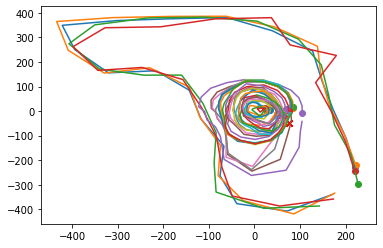

moved: (629.6503167753677, 610.7413125646615)
Healing: moving to given mean (629.6503167753677, 610.7413125646615)


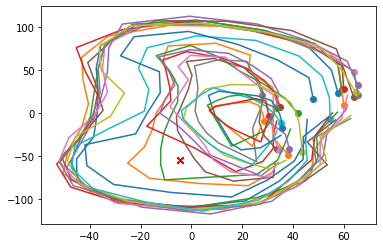

moved again: (629.6503167753677, 610.7413125646615)
[[ 163.72972973 1003.10810811]
 [1074.54054054 1001.75675676]
 [1073.18918919   90.94594595]
 [ 165.08108108   90.94594595]]
[910.8118132964248, 910.8118132964248, 908.1081081081081] 0.4442922745281506
sf 0.4442922745281506
moved is: (629.6503167753677, 610.7413125646615)
new_peaks: [76.84382384963226, -49.745218814661484] [-4.380297244117742, -54.188578189661484]


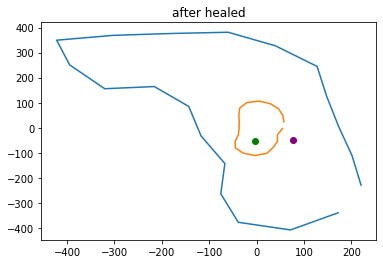

Moving to mean
levels skip: 3 [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]
min/max level: 4 37
removing zeroes
levels skip: 3 [8, 11, 14, 17, 20, 23, 26, 29]
min/max level: 8 29
removing zeroes
after export plot show [array([706.494140625, 560.99609375], dtype=object), array([625.27001953125, 556.552734375], dtype=object)]


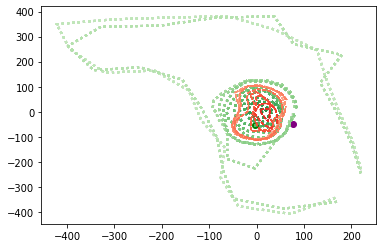

move_to_mean: (-7.642812619940574e-14, -8.136410934978402e-14, 4) moved (629.6503167753677, 610.7413125646615)
Moved was (629.6503167753677, 610.7413125646615) to [-4.380297244117742 -54.188578189661484]
Move_to_mean was (-7.642812619940574e-14, -8.136410934978402e-14, 4) to [-4.380297244117665 -54.188578189661406]
Wrote meta (for AFM-C HUVEC 20200626 Group #1, Cell #2) to export_contours/test_HUVEC1_L2/file.txt


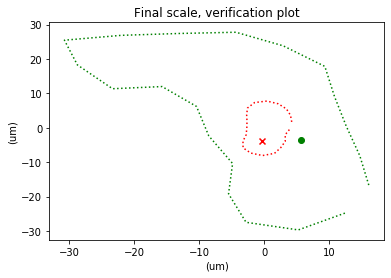

In [30]:
def make_contour(output_folder, annotation_folder, probe_info=None, npts=21, padding=20, mirror_x=0, mirror_y=0, cXY=None):

    tags = ['nucleus_linear3D', 'cyto_linear3D', 'other_linear3D']

    envelope_nucleus = contour.convert_annotated(annotation_folder, 'nucleus_linear3D')
    envelope_cyto = contour.convert_annotated(annotation_folder, 'cyto_linear3D')
    envelope_other = contour.convert_annotated(annotation_folder, 'other_linear3D')

    ee = deepcopy(envelope_cyto)
    ne = deepcopy(envelope_nucleus) if len(envelope_nucleus) else deepcopy(envelope_other)
    cyto_padded = contour.reparam_contour3(ee, ne, doPlot=False, padding=padding, npts=npts, debug=True) #, cXY=cXY)
    nuc_padded = contour.reparam_contour3(ne, None, doPlot=False, padding=padding, npts=npts, debug=True) # , cXY=cXY)

    ###################
    # Caps and overhang
    if False:
        for n in list(sorted(nuc_padded.keys())):
            if n not in envelope_cyto:
                cyto_padded[n] = deepcopy(nuc_padded[n])
                print('Adding cyto layer to match nuc', n)

    if False:
        min_ne = min(nuc_padded.keys())
        if min_ne - 1 not in cyto_padded:
            print('Adding bottom layer')
            cyto_padded[min_ne - 1] = deepcopy(nuc_padded[min_ne])

    cyto_padded = contour.reparam_contour3(cyto_padded, nuc_padded, doPlot=False, padding=padding, npts=npts)
    nuc_padded = contour.reparam_contour3(nuc_padded, None, doPlot=False, padding=padding, npts=npts)

    cap_size_top = 2
    cap_size_bot = 2
    if True:
        # build up cyto above last nucleus
        max_ne = max(nuc_padded.keys())
        while max_ne >= max(cyto_padded.keys())-cap_size_top:
            print('Adding top cap at: ', max(cyto_padded.keys())+1)
            cyto_padded[max(cyto_padded.keys())+1] = deepcopy(cyto_padded[max(cyto_padded.keys())])

        min_ne = min(nuc_padded.keys())
        print('min:', min_ne, min(cyto_padded.keys()))
        while min_ne <= min(cyto_padded.keys())+cap_size_bot:
            print('Adding bottom cap at: ', min(cyto_padded.keys())-1)
            cyto_padded[min(cyto_padded.keys())-1] = deepcopy(cyto_padded[min(cyto_padded.keys())])

    if False:
        max_ne = max(nuc_padded.keys())
        cap_size = 0.3
        if max_ne + 1 not in cyto_padded:
            print('Adding cap layer')
            cyto_padded[max_ne + 1] = deepcopy(cyto_padded[max_ne])
            if cap_size > 0:
                cyto_padded[max_ne + 1] = deepcopy(cyto_padded[max_ne])
            if cap_size > 0.1:
                cyto_padded[max_ne + 2] = deepcopy(cyto_padded[max_ne])
            if cap_size > 0.2:
                cyto_padded[max_ne + 3] = deepcopy(cyto_padded[max_ne])


        # maybe a while loop?
        cap_size = 0.3
        min_ne = min(cyto_padded.keys())
        if min_ne >= min(nuc_padded.keys()):
            print('Adding bottom cap layer')
            if cap_size > 0:
                cyto_padded[min_ne - 1] = deepcopy(cyto_padded[min_ne])
            if cap_size > 0.1:
                cyto_padded[min_ne - 2] = deepcopy(cyto_padded[min_ne])
            if cap_size > 0.2:
                cyto_padded[min_ne - 3] = deepcopy(cyto_padded[min_ne])

    #################
    # Countour Healing

    # Bad values, because they don't account for centering
    tp0 = contour.transform_probe(probe_info[0], mirror_x=mirror_x, mirror_y=mirror_y)
    tp1 = contour.transform_probe(probe_info[1], mirror_x=mirror_x, mirror_y=mirror_y)

    print('transformed:', tp0, tp1)
    cyto_contour, moved = confocal.heal_contour(cyto_padded, probe_marker=tp0)
    print('moved:', moved)
    # # print(res.keys())
    nucleus_contour, moved = confocal.heal_contour(nuc_padded, move_to_mean=moved, probe_marker=tp1)
    print('moved again:', moved)
    sf = contour.get_scaling_factor(open(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation', 'scaling.json')))

    # plot healed
    plt.plot(cyto_contour[min(cyto_contour.keys())][0],cyto_contour[min(cyto_contour.keys())][1])
    plt.plot(nucleus_contour[min(nucleus_contour.keys())][0],nucleus_contour[min(nucleus_contour.keys())][1])
    plt.title('after healed')

    print('moved is:', moved)
    new_peak0 = [(tp0[0]-moved[0])*(0.03237/sf)**0,  (tp0[1]-moved[1])*(0.03237/sf)**0]
    new_peak1 = [(tp1[0]-moved[0])*(0.03237/sf)**0,  (tp1[1]-moved[1])*(0.03237/sf)**0]

    print('new_peaks:', new_peak0, new_peak1)
    plt.scatter(new_peak0[0],new_peak0[1], marker='o', color='purple')
    plt.scatter(new_peak1[0],new_peak1[1], marker='o', color='green')


    plt.show()


    os.makedirs(output_folder, exist_ok=True)

    # Export
    cyto_meta = confocal.export_contours(cyto_contour, ncvar='NCY', filen='C_Cyto_Z', scaling=(0.03237/sf, 0.03237/sf, 0.1),
                export_dir=output_folder, color_range='green', move_to_mean=None, skip_z=3, linestyle='dotted')
    nuc_meta = confocal.export_contours(nucleus_contour, ncvar='NC', filen='C_Nuc_Z', scaling=(0.03237/sf, 0.03237/sf, 0.1),
                export_dir=output_folder, color_range='red', move_to_mean=cyto_meta['move_to_mean'], skip_z=3, linestyle='dashed', linewidth=1)
    print('after export plot show', [tp0, tp1])


    plt.scatter(new_peak0[0],new_peak0[1], marker='o', color='purple')
    plt.scatter(new_peak1[0],new_peak1[1], marker='o', color='green')

    plt.show()

    print('move_to_mean:', cyto_meta['move_to_mean'], 'moved', moved)
    contour.export_probes(probes=[tp0, tp1], export_dir=output_folder, moved=moved, move_to_mean=cyto_meta['move_to_mean'], scaling=0.03237/sf)

    # move_to_mean: x_out = (x - xm) * scaling[0]



    meta_fname = os.path.join(output_folder,'file.txt')
    confocal.export_contours_meta('AFM-C HUVEC 20200626 Group #1, Cell #2', meta_fname, cyto_meta, nuc_meta)

    # Verification image
    nuc_re = contour.load_exported(os.path.join(output_folder, 'C_Nuc_Z01.txt'))
    cyto_re = contour.load_exported(os.path.join(output_folder, 'C_Cyto_Z01.txt'))
    p_c = [float(_.strip()) for _ in
           open(os.path.join(output_folder, 'probe_cyto.txt')).readlines()]
    p_n = [float(_.strip()) for _ in
           open(os.path.join(output_folder, 'probe_nuclear.txt')).readlines()]

    plt.plot(cyto_re.T[0], cyto_re.T[1], color='green', linestyle=':')
    plt.scatter(p_c[0], p_c[1], marker='o', color='green')
    plt.plot(nuc_re.T[0], nuc_re.T[1], linestyle=':', color='red')
    plt.scatter(p_n[0], p_n[1], marker='x', color='red')
    plt.title('Final scale, verification plot')
    plt.xlabel('(um)')
    plt.ylabel('(um)')

    plt.savefig(os.path.join(output_folder,'probe_positions.png'))
    plt.show()

    return [nuc_re, cyto_re]
    
all_tips = np.load(os.path.join('datasets/SR_HUVEC1/Overlay Images HUVEC/', 'centered_all.npy'), allow_pickle=True)
all_xy_mirror = [[None, 1, 0, 0, 0, 0, 0, 0], [None, 1, 0, 0, 0, 0, 0, 0]]


_ = celln = cell_num = 2 #1

mirror_x = all_xy_mirror[0][_]
mirror_y = all_xy_mirror[1][_]

print('Starting to export %d' % _)

print('tips: ', [all_tips[0][_][:2], all_tips[1][_][:2]])
res = make_contour(output_folder="export_contours/test_HUVEC1_L%d" % _, # special 'L' here for longitudinal
     annotation_folder='datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % _,
     probe_info=[all_tips[0][_][:2], all_tips[1][_][:2]],
     mirror_x=mirror_x,
     mirror_y=mirror_y,
#      cXY=(620, 600),
     # nuc_option='nucleus' if _ != 7 else 'other',
)



100%|██████████| 24/24 [00:00<00:00, 1400.98it/s]


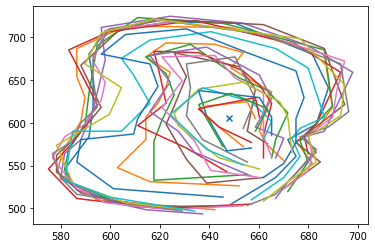

In [35]:
# To continue:
# 
envelope_nucleus = contour.convert_annotated('datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % celln, 'nucleus_linear3D')

for _ in deepcopy(envelope_nucleus):
    plt.plot(envelope_nucleus[_][0],envelope_nucleus[_][1])
# plt.show()
    
plt.scatter([648],[605], marker='x')

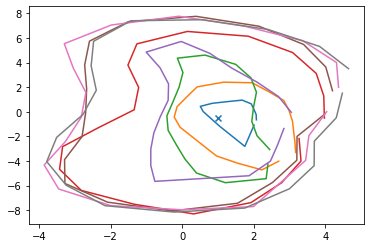

In [36]:
globbed = glob.glob(os.path.join("export_contours/test_HUVEC1_L%d" % celln, 'C_N*_Z*.txt'))
global_data = []
for fname in globbed:
    data = contour.load_exported(fname)
    plt.plot(data.T[0], data.T[1])
    global_data.append(data)
    
plt.scatter(1,-0.5,marker='x')

gt = np.array(global_data).T
gt.shape
for _ in range(20):
    plt.plot(gt[0][_],gt[1][_])

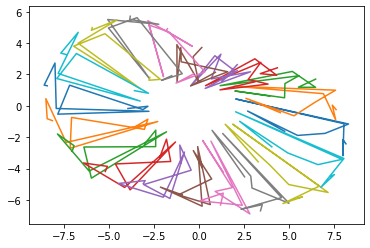

# Principled retry

100%|██████████| 30/30 [00:00<00:00, 1466.42it/s]


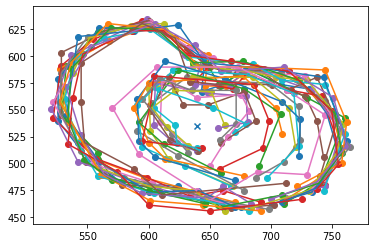

In [129]:
celln=1

cell_centers = [
    [None, None],
    [640, 535],
    [648, 605],
    [665, 425],
    [620, 600],
    [675, 660],
    [640, 515],
    [583, 592],
    ]
cXg, cYg = cell_centers[celln]
nuc_tag = 'other_linear3D' if celln==7 else 'nucleus_linear3D'

exc = contour.convert_annotated('datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % celln, nuc_tag)

# Here I just plot the raw points
for target_level in exc:
# target_level = 13
#     print(exc[target_level])
    plt.plot(exc[target_level][0],exc[target_level][1])
    plt.scatter(exc[target_level][0],exc[target_level][1])
#     print(exc.keys())
#     break

plt.scatter(cXg, cYg, marker='x')

Text(0.5, 1.0, 'Top layer of nucleus')

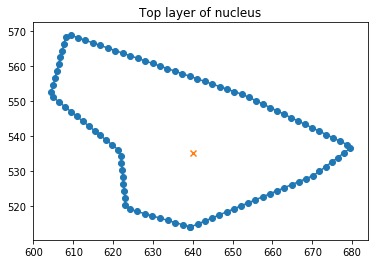

In [130]:
# Here I demonstrate that I can create points between annotated vertices
exc_morepts = contour.make_more_pts_dist_edited(exc[target_level], heal=True)

plt.plot(exc_morepts[0], exc_morepts[1])
plt.scatter(exc_morepts[0], exc_morepts[1])
plt.scatter(cXg, cYg, marker='x')
plt.title('Top layer of nucleus')

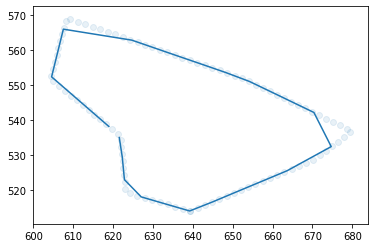

In [131]:
# here I demonstrate selecting points-between-vertices using a polar coordinates

exc_rad, exc_the, exc_ftr = contour.get_radius_theta(exc_morepts[0], exc_morepts[1], cXg, cYg)
npts = 21
t0 = np.linspace(-np.pi, np.pi - np.pi / npts, npts)
r0g = exc_ftr(t0)
gx, gy = cXg + r0g * np.cos(t0), cYg + r0g * np.sin(t0)

plt.plot(gx, gy)
plt.scatter(exc_morepts[0], exc_morepts[1], alpha=0.1)

Files: 12 10
(10, 3, 20)


/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


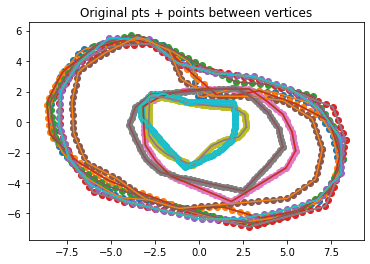

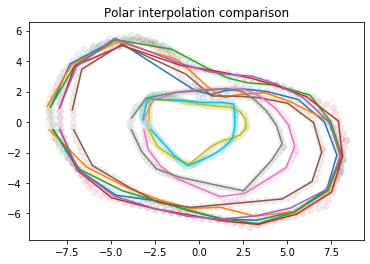

Text(0.5, 1.0, 'Demonstrate longitude lines')

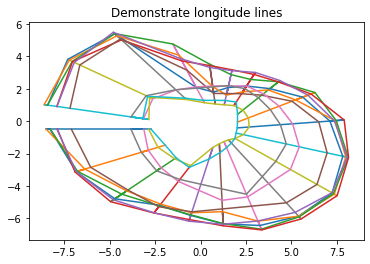

In [136]:
# Now I pull it all together as a demo

npts_extra = 101

# Input files
input_folder = "export_contours/test_HUVEC1_%d" % cell_num
output_folder = "export_contours/test_HUVEC1_L%d" % cell_num
input_cyto = glob.glob(os.path.join(input_folder, 'C_Cyto_Z*.txt'))
input_nuc = glob.glob(os.path.join(input_folder, 'C_Nuc_Z*.txt'))

print('Files:', len(input_cyto), len(input_nuc))

fig1, ax1 = plt.subplots() # 
fig2, ax2 = plt.subplots() # 

all_edits = []

os.makedirs(output_folder,exist_ok=True)
# Load contours and output one by one
for fname in sorted(input_nuc):
    nuc_re = contour.load_exported_ext(fname)
    rows = np.array(nuc_re['rows']).T
#     print(rows.shape)
    ax1.plot(rows[0], rows[1]) 
    # the only deficiency in this approach is that we don't have

    exc_morepts = contour.make_more_pts_dist_edited(rows, heal=True)

    # print(exc_morepts)
    ax1.plot(exc_morepts[0], exc_morepts[1])
    ax1.scatter(exc_morepts[0], exc_morepts[1])
#     ax1.scatter(cXg,cYg, marker='x')
    
    cXg = 1
    cYg = -0.5

    
    exc_rad, exc_the, exc_ftr = contour.get_radius_theta(exc_morepts[0], exc_morepts[1], cXg, cYg)
    npts = rows.shape[1]
    t0 = np.linspace(-np.pi, np.pi - np.pi / npts, npts)
    r0g = exc_ftr(t0)
    gx, gy = cXg + r0g * np.cos(t0), cYg + r0g * np.sin(t0)

    ax2.plot(gx, gy)
    ax2.scatter(exc_morepts[0], exc_morepts[1], alpha=0.1)
    
    altered_contour = np.array([gx, gy, rows[-1][:]])
#     print(np.shape(gx), np.shape(rows))
    all_edits.append(altered_contour)
    
ax1.set_title('Original pts + points between vertices')
ax2.set_title('Polar interpolation comparison')
    
all_edits = np.array(all_edits)

print(np.shape(all_edits))
fig1.show()
fig2.show()
plt.show()
for _ in all_edits.transpose([2,0,1]):
#     print(_.shape)
    plt.plot(_[:,0], _[:,1])
    
for _ in all_edits.transpose([0,1,2]):
#     print(_.shape)
    plt.plot(_[0],_[1])
    
plt.title('Demonstrate longitude lines')

Files: 9
Re-centering 1 -0.5
appending: (3, 20)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)


ValueError: could not broadcast input array from shape (3,20) into shape (3)

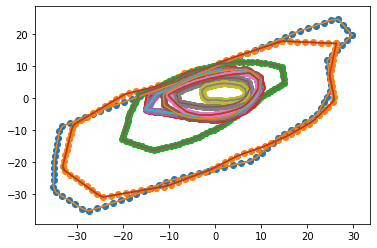

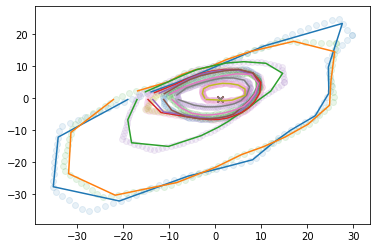

In [213]:
def remake_contours(input_folder, file_stub, recentering=None, adjust_probe=False, title='', doPlot=True):
    input_contours = glob.glob(os.path.join(input_folder, file_stub))

    print('Files:', len(input_contours))
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()

    all_edits = []
    if recentering is not None:
        cXg, cYg = recentering
    else:
        cXg, cYg = 0,0
        
    print('Re-centering', cXg, cYg)

    # Load contours and output one by one
    for fname in sorted(input_contours):
        nuc_re = contour.load_exported_ext(fname)
        rows = np.array(nuc_re['rows']).T
        
        if adjust_probe:
            
            rows[0] -= cXg
            rows[1] -= cYg
            zcXg = 0
            zcYg = 0
        else:
            zcXg = cXg
            zcYg = cYg
#         rows -= np.array([cXg, cYg, 0])
        
    #     print(rows.shape)
        ax1.plot(rows[0], rows[1])
        # the only deficiency in this approach is that we don't have

        exc_morepts = contour.make_more_pts_dist_edited(rows, heal=True)

        # print(exc_morepts)
        ax1.plot(exc_morepts[0], exc_morepts[1])
        ax1.scatter(exc_morepts[0], exc_morepts[1])
    #     ax1.scatter(cXg,cYg, marker='x')



        exc_rad, exc_the, exc_ftr = contour.get_radius_theta(exc_morepts[0], exc_morepts[1], zcXg, zcYg)
        npts = rows.shape[1]
        t0 = np.linspace(-np.pi, np.pi - np.pi / npts, npts)
        r0g = exc_ftr(t0)
        gx, gy = zcXg + r0g * np.cos(t0), zcYg + r0g * np.sin(t0)

        ax2.plot(gx, gy)
        ax2.scatter(exc_morepts[0], exc_morepts[1], alpha=0.1)
        
        ax2.scatter(zcXg, zcYg, marker='x')

        altered_contour = np.array([gx, gy, rows[-1][:]])
#         print(np.shape(gx), np.shape(rows))
#         print('appending:', np.shape(altered_contour))
        all_edits.append(altered_contour)

#     print('all_edits:', [len(_) for _ in all_edits])
    all_edits = np.array(all_edits)

#     print(np.shape(all_edits))
    fig1.show()
    fig2.show()
    plt.show()
    for _ in all_edits.transpose([2,0,1]):
    #     print(_.shape)
        plt.plot(_[:,0], _[:,1], linestyle=':')
    

    for _ in all_edits.transpose([0,1,2]):
#         print(_.shape)
        plt.plot(_[0],_[1])
    plt.savefig(os.path.join(output_folder,'%s.png' % title),bbox_inches='tight')
    pass

    return all_edits

remade_cyto = remake_contours(input_folder=input_folder, file_stub='C_Cyto_Z*.txt', recentering = (1,-0.5), adjust_probe=False, title='Cyto')
remade_nuc = remake_contours(input_folder=input_folder, file_stub='C_Nuc_Z*.txt', recentering = (1,-0.5), adjust_probe=False, title='Nuc')

#     input_nuc = glob.glob(os.path.join(input_folder, 'C_Nuc_Z*.txt'))

# remade_nuc = remake_contours()


In [221]:
def rewrite(nuc_contours, cyto_contours, output_folder, offset, zs=None, levels=None):
    os.makedirs(output_folder,exist_ok=True)
    for n,row in enumerate(nuc_contours):
        fname_out = os.path.join(output_folder, 'C_Nuc_Z%02d.txt' % (n+1))
        print(fname_out)
        print(row)
        
        with open(fname_out,'w') as fout:
            fout.write('!-----------------------\n')
            fout.write('!Contour #%02d' % (n) + '\n')
            fout.write('!-----------------------\n')
            fout.write('NC(%d)=%d\n' % (n, len(row[0])))

            for r in row.T:
                fout.write('k,,%0.3f,%0.3f,%0.3f\n' % (r[0], r[1], r[2]))
            
        
    for n,row in enumerate(cyto_contours):
        fname_out = os.path.join(output_folder, 'C_Cyto_Z%02d.txt' % (n+1))
        print(fname_out)
        print(row)
    
        with open(fname_out,'w') as fout:
            fout.write('!-----------------------\n')
            fout.write('!Contour #%02d' % (n) + '\n')
            fout.write('!-----------------------\n')
            fout.write('NC(%d)=%d\n' % (n, len(row[0])))

            for r in row.T:
                fout.write('k,,%0.3f,%0.3f,%0.3f\n' % (r[0], r[1], r[2]))
        
rewrite(remade_nuc, remade_cyto, output_folder="export_contours/test_HUVEC1_L%d" % cell_num, offset=None, zs=None, levels=None)


export_contours/test_HUVEC1_L4/C_Nuc_Z01.txt
[[-5.08666284 -2.91709697 -0.74548186 -0.3278745   0.0744874   1.16659993
   2.64451834  4.25345388  5.563445    6.15217388  5.7201459   4.77667934
   4.02021246  3.32369475  2.09403169  0.18459725 -2.16368513 -4.2003094
  -5.58007211 -5.60546437]
 [-0.5        -1.80864209 -1.8128028  -2.42637763 -3.70540846 -4.52801484
  -4.81965988 -4.47270973 -3.37492569 -1.75947496 -0.10887756  1.1195082
   2.1894185   3.55049468  4.94126888  6.04154515  6.10935143  4.87518799
   2.92152845  0.54620278]
 [ 0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3       ]]
export_contours/test_HUVEC1_L4/C_Nuc_Z02.txt
[[-5.81245797 -1.91900703 -0.63138006 -0.47656766  0.06697905  1.16885944
   2.58212343  4.09557669  5.37787708  5.8877715   5.67881826  5.085389
   3.9995069   3.15683455  2.03300123  

# Condensation

In [189]:
import cv2

In [121]:
# settings

celln=1

cell_centers = [
    [None,None],
    [640, 535],
    [648, 605],
    [665, 425],
    [620, 600],
    [675, 660],
    [640, 515],
    [583, 592],
    ]
cXg, cYg = cell_centers[celln]
nuc_tag = 'other_linear3D' if celln==7 else 'nucleus_linear3D'

100%|██████████| 30/30 [00:00<00:00, 1468.08it/s]


Text(0.5, 1.0, 'Annotated nucleus contour points')

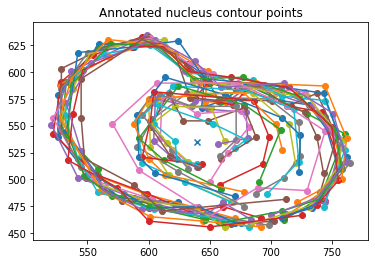

In [127]:
exc = contour.convert_annotated('datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % celln, nuc_tag)

# Plot original contours with marker
for target_level in exc:
    plt.plot(exc[target_level][0],exc[target_level][1])
    plt.scatter(exc[target_level][0],exc[target_level][1])

plt.scatter(cXg, cYg, marker='x')
plt.title('Annotated nucleus contour points')

1 nucleus_linear3D


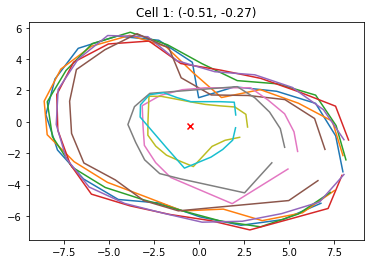

2 nucleus_linear3D


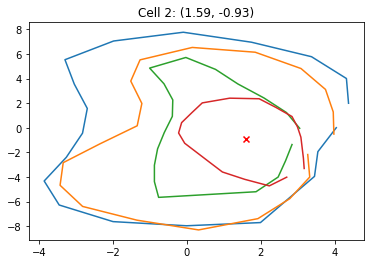

3 nucleus_linear3D


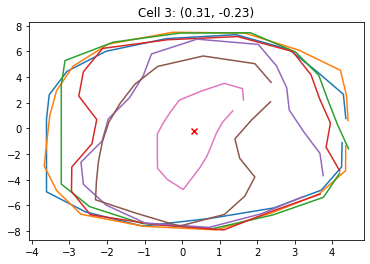

4 nucleus_linear3D


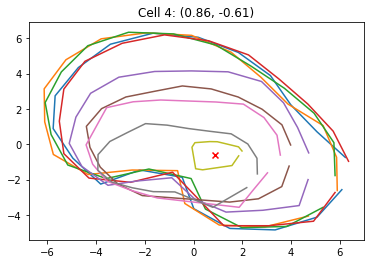

5 nucleus_linear3D


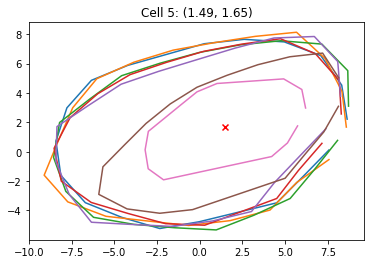

6 nucleus_linear3D


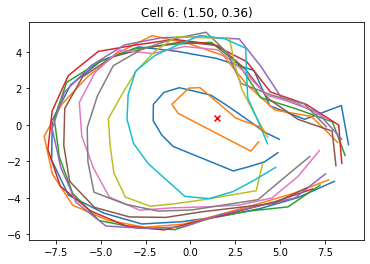

7 other_linear3D


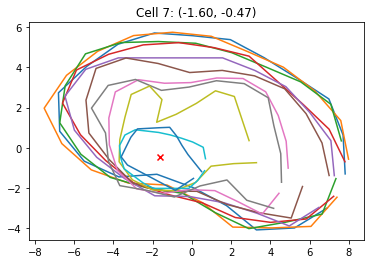

In [188]:
# Quick load: transform only the previously output contours
# This cell calculates and displays the center of gravity for output contours, so that we can properly polarize them.

nuc_cog = {}
for _ in range(1,7+1):
    nuc_tag = 'other_linear3D' if _==7 else 'nucleus_linear3D'
    print(_, nuc_tag)
#     exc = contour.convert_annotated('datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % _, nuc_tag)
#     print(exc.keys())
    input_folder = "export_contours/test_HUVEC1_%d" % _
#     remade_nuc = remake_contours(input_folder=input_folder, file_stub='C_Nuc_Z*.txt', recentering = (1,-0.5), adjust_probe=False, title='Nuc')
    files = sorted(glob.glob(os.path.join(input_folder,'C_Nuc_Z*.txt')))
    if False:
        nuc_re = contour.load_exported_ext(files[0])
        rows = np.array(nuc_re['rows']).T
        plt.plot(rows[0], rows[1])

        nuc_re = contour.load_exported_ext(files[-1])
        rows = np.array(nuc_re['rows']).T
        plt.plot(rows[0], rows[1])
    else:
        for f in files:
            nuc_re = contour.load_exported_ext(f)
            rows = np.array(nuc_re['rows']).T
            plt.plot(rows[0], rows[1])
            
    M = cv2.moments(rows[0:2].T.astype(np.float32))
    cX, cY = M["m10"] / M["m00"], M["m01"] / M["m00"]
    plt.scatter(cX, cY, marker='x', color='red')
    nuc_cog[_] = [cX, cY]
    plt.title('Cell %d: (%0.2f, %0.2f)' % (_, cX, cY))
    plt.show()    

Files: 9
Re-centering 1.4937682102614473 1.6480896193804906
appending: (3, 20)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)


ValueError: could not broadcast input array from shape (3,20) into shape (3)

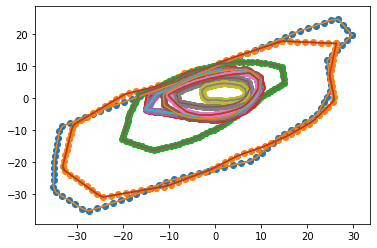

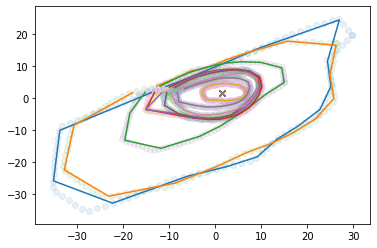

In [214]:
_ = 5
input_folder = "export_contours/test_HUVEC1_%d" % _

remade_cyto = remake_contours(input_folder=input_folder, file_stub='C_Cyto_Z*.txt', recentering = nuc_cog[_], adjust_probe=False, title='Cyto')
remade_nuc = remake_contours(input_folder=input_folder, file_stub='C_Nuc_Z*.txt', recentering = nuc_cog[_], adjust_probe=False, title='Nuc')

# ok, we can't use the shortcut and just load pre-exported contours, because these contours have been treated. 
# For example, repetitive points have been removed.
# gotta do the whole thing again.


In [207]:
np.shape(all_edits)

(10, 3, 20)

In [179]:
rows[:2]

array([[ 0.496,  0.148, -0.2  , -0.507, -0.785, -1.131, -1.677, -2.226,
        -2.774, -3.11 , -3.358, -3.604, -3.283, -2.795, -2.307, -1.819,
        -1.331, -0.843, -0.381,  0.082],
       [-1.188, -0.763, -0.338,  0.118,  0.591,  1.017,  0.995,  0.966,
         0.937,  0.523,  0.034, -0.458, -0.861, -1.113, -1.365, -1.618,
        -1.87 , -2.123, -1.825, -1.528]])

# From the start

Files: 12
Re-centering -0.5147485429049651 -0.2709121135039263
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)


/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


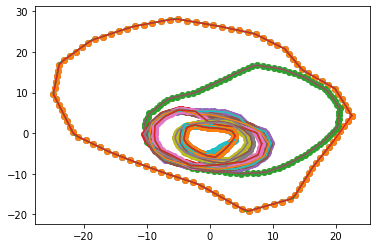

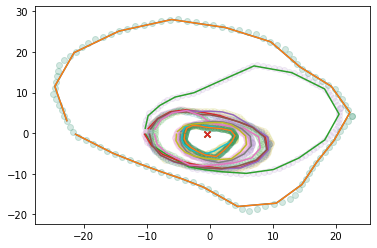

Files: 10
Re-centering -0.5147485429049651 -0.2709121135039263
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)
appending: (3, 21)


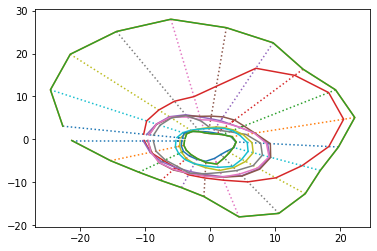

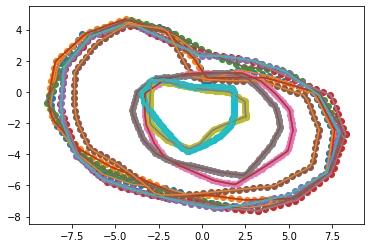

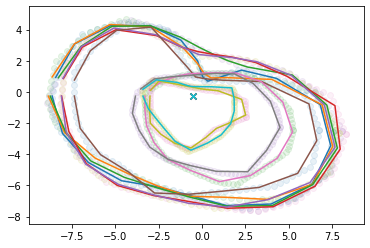

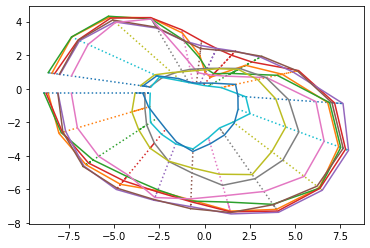

In [215]:
# Have to do the full round trip treatment. But that's fine. Better, even.

# Todo
# . Find where we do the full treatment. A py file?
# . Adjust it so we properly use the polarized treatment done here
# . Include translation to CoG: both the contour and probe position
# . Export error checks: original images, contours, etc

_ = 1
input_folder = "export_contours/test_HUVEC1_P%d" % _

remade_cyto = remake_contours(input_folder=input_folder, file_stub='C_Cyto_Z*.txt', recentering = nuc_cog[_], adjust_probe=False, title='Cyto')
remade_nuc = remake_contours(input_folder=input_folder, file_stub='C_Nuc_Z*.txt', recentering = nuc_cog[_], adjust_probe=False, title='Nuc')






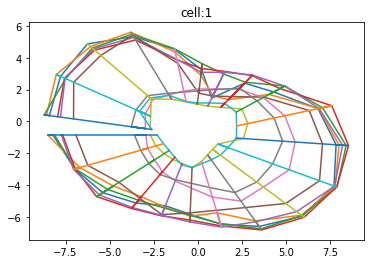

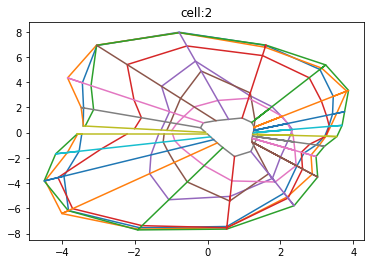

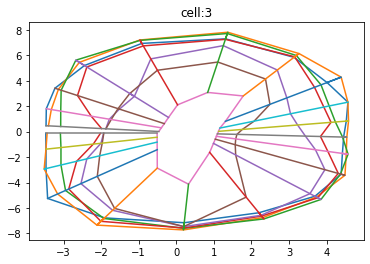

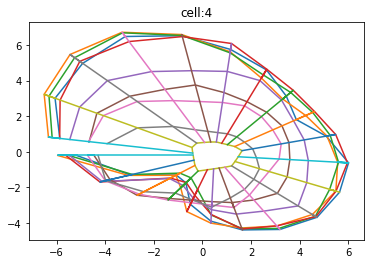

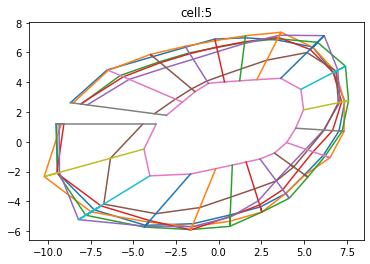

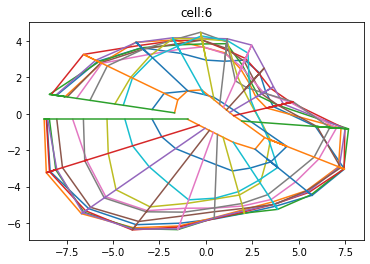

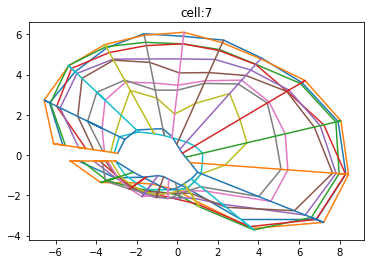

In [259]:
# Final Check
for _celln in range(1,1+7):
    globbed = glob.glob(os.path.join("export_contours/test_HUVEC1_P%d" % _celln, 'C_N*_Z*.txt'))
    global_data = []

    # circumferential + data-appending
    for fname in sorted(globbed, key=lambda x: int(x.split('_Z')[1][:-4])):
    #     print('fname:', fname)
        data = contour.load_exported(fname)
        plt.plot(data.T[0], data.T[1])
        global_data.append(data)

    # plt.scatter(1,-0.5,marker='x')

    # longitudinal
    gt = np.array(global_data).T
    gt.shape
    for _ in range(21):
        plt.plot(gt[0][_],gt[1][_])
        
    plt.title('cell:' + str(_celln))
    plt.show()

In [246]:
int('cyto_Z13.txt'.split('_Z')[1][:-4])

13

# Strategic Interpolation

In [261]:
# Goal: Interpolate each polar line so that we can eventually plot an equal number of layers for each cell.

In [266]:
reload(contour)

<module 'contour' from '/Users/asears/work/confocal/contour.py'>

In [463]:
_ = 1

# output_folder="export_contours/test_HUVEC1_I%d" % _
annotation_folder='datasets/SR_HUVEC1/HUVEC Cell %d/annotation' % _
# input_folder = "export_contours/test_HUVEC1_P%d" % _

envelope_nucleus = contour.convert_annotated(annotation_folder, 'nucleus_linear3D')
envelope_cyto = contour.convert_annotated(annotation_folder, 'cyto_linear3D')
envelope_other = contour.convert_annotated(annotation_folder, 'other_linear3D')

ee = deepcopy(envelope_cyto)
ne = deepcopy(envelope_nucleus) if len(envelope_nucleus) else deepcopy(envelope_other)

# Find center of mass at top:
last_level = list(sorted(ne.keys()))[-1]
print('Last level polygon:', ne[last_level])
rows = ne[last_level][:2].T.astype(np.float32)
M = cv2.moments(rows)
recentering = M["m10"] / M["m00"], M["m01"] / M["m00"]
print('Reentered:', recentering)
# raise Exception('stop')

# Calls edit_level on each level, which expands out, and does some other conditioning.
# nuclear envelope included so that cytoplasm is always outside
cyto_padded = contour.reparam_contour4(ee, ne, doPlot=False, padding=None, npts=npts, recentering=recentering)
# no such req for nucleus itself
nuc_padded = contour.reparam_contour4(ne, None, doPlot=False, padding=None, npts=npts, recentering=recentering)


100%|██████████| 27/27 [00:00<00:00, 1398.76it/s]
0it [00:00, ?it/s]

Last level polygon: [[639.40540541 623.18918919 621.83783784 604.27027027 608.32432432
  652.91891892 679.94594595 670.48648649]
 [513.91891892 519.32432432 535.54054054 551.75675676 569.32432432
  551.75675676 536.89189189 528.78378378]]
Reentered: (638.2632769400252, 540.2617568572019)


nuc vals: [107.78463579 107.78463579 106.95018328 102.43480863 101.1485654
  63.16962273  44.3478527   41.44519144  30.06707367  25.0098968 ] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


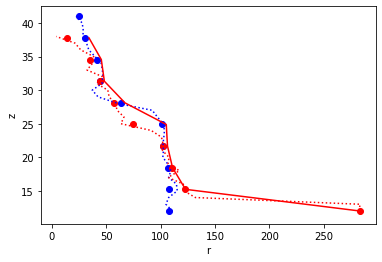

nuc vals: [93.58644888 93.58644888 93.58644888 92.8479382  92.8479382  60.02607429
 45.04990032 39.64129677 25.83938785 20.27027163] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


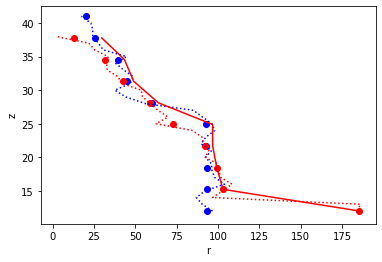

nuc vals: [80.70036845 80.70036845 80.70036845 80.70036845 80.70036845 52.84495925
 44.39376992 34.8934053  24.33812234 20.35584409] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


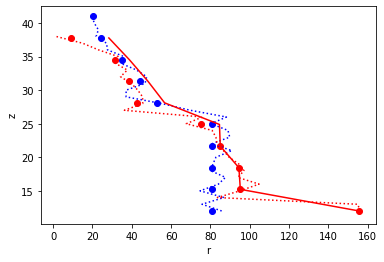

nuc vals: [69.23504088 69.23504088 69.23504088 69.23504088 69.23504088 51.27275225
 42.8587729  31.49026395 24.08180816 23.21795734] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


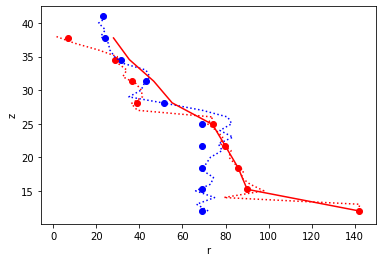

nuc vals: [63.61885484 63.61885484 63.61885484 63.61885484 63.61885484 53.65092298
 42.46770465 30.47802397 26.10250429 24.15144485] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


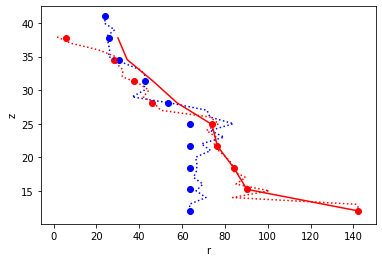

nuc vals: [69.5038264  69.5038264  69.5038264  69.5038264  69.5038264  57.84946189
 46.52209083 32.94793485 29.36515151 22.97099944] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


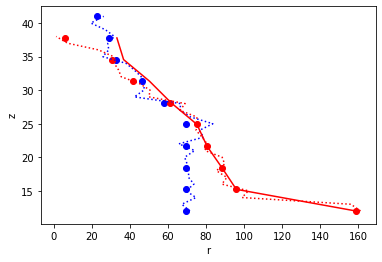

nuc vals: [82.44286753 74.25893048 74.25893048 74.25893048 74.25893048 65.15481213
 58.19576925 42.04356627 30.96092673 20.82556826] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


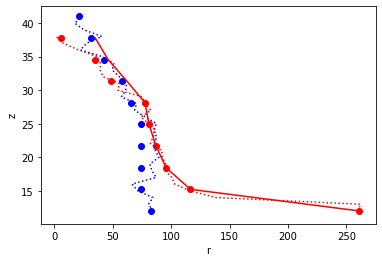

nuc vals: [98.83337245 98.56289352 98.56289352 98.56289352 96.18540714 73.55564552
 69.18597999 49.84510533 28.90237204 21.02702474] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


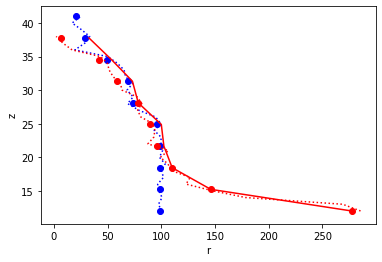

nuc vals: [113.98373241 113.98373241 113.98373241 113.98373241 113.98373241
  89.25924576  76.30568715  53.81553341  29.5654519   23.71296672] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


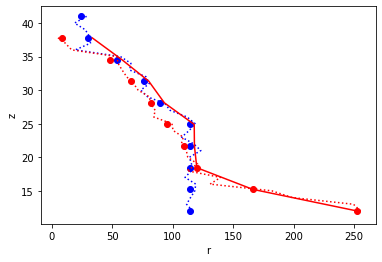

nuc vals: [120.69034782 117.39829347 117.39829347 117.39829347 117.39829347
  97.72341926  84.81808726  56.38963745  33.9748843   30.00627143] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


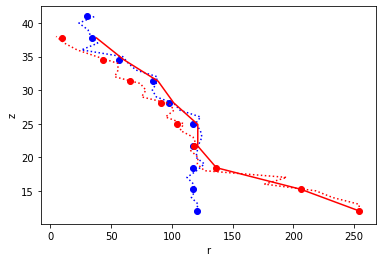

nuc vals: [108.0996383  108.0996383  108.0996383  108.0996383  108.0996383
  93.97381135  79.38943247  60.9047065   41.56957018  26.47794284] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


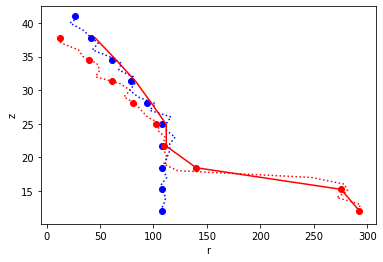

nuc vals: [86.73682962 82.12811062 82.12811062 82.12811062 82.12811062 75.17586641
 67.11173473 54.46571437 43.17489055 21.52441508] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


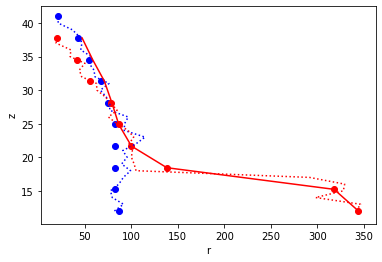

nuc vals: [68.12446167 63.54170036 63.54170036 63.54170036 63.54170036 56.02385233
 56.02385233 47.57173607 34.01036996 20.51216001] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


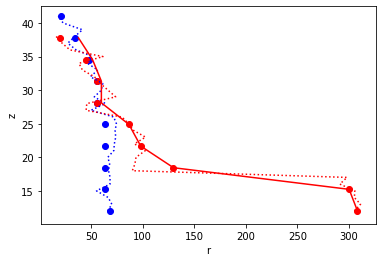

nuc vals: [36.52444295 36.52444295 36.52444295 36.52444295 36.52444295 36.52444295
 36.52444295 36.52444295 24.25808309 22.18970928] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


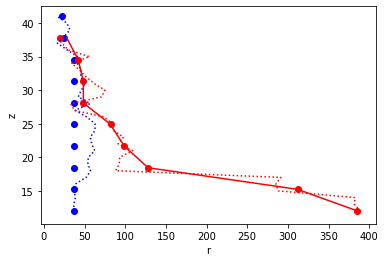

nuc vals: [38.2186223  38.2186223  38.2186223  38.2186223  38.2186223  38.2186223
 38.2186223  36.8753     21.37201022 21.37201022] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


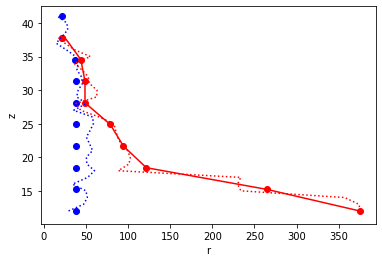

nuc vals: [71.98321894 65.83364635 64.94233232 64.94233232 64.94233232 42.99541582
 42.99541582 38.48789477 22.28561799 22.28561799] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


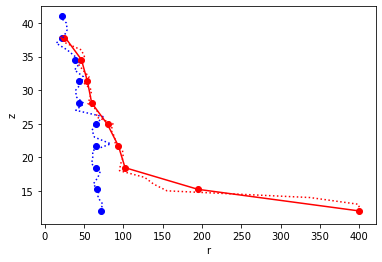

nuc vals: [94.86144117 94.86144117 94.86144117 94.35430325 93.99051072 60.76132535
 48.86748287 41.40484873 32.28159109 27.07861877] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


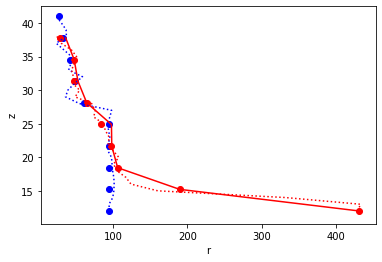

nuc vals: [108.90449392 108.90449392 108.90449392 108.90449392 104.81784895
  61.57890456  47.27044717  45.1775747   41.91032131  35.31246974] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


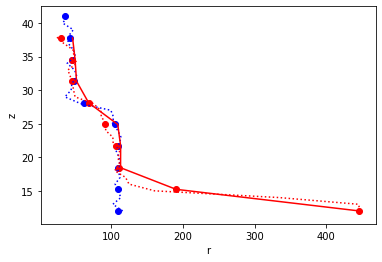

nuc vals: [115.33113796 115.33113796 114.91932932 112.52366386 108.70798359
  65.05867737  47.31669316  40.44890153  37.8276124   35.55141455] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


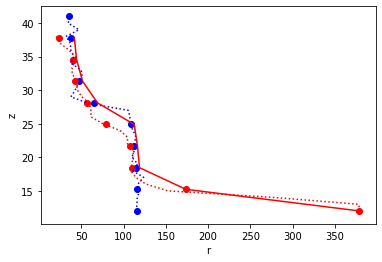

nuc vals: [110.99859491 110.99859491 110.99859491 107.95486181 103.53976403
  65.29243423  45.58888612  40.2658202   32.39938904  28.74738041] [12.0, 15.222222222222221, 18.444444444444443, 21.666666666666668, 24.88888888888889, 28.11111111111111, 31.333333333333336, 34.55555555555556, 37.77777777777778, 41.0]


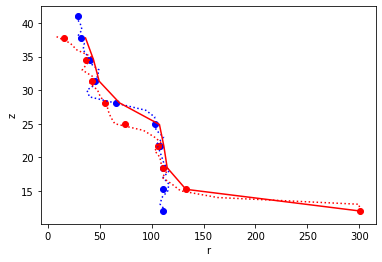

In [441]:
# for lev in nuc_padded:
#     print(lev, nuc_padded[lev].shape)
#     plt.plot(nuc_padded[lev][0], nuc_padded[lev][1])
#     plt.show()

for PL in range(20): # PL are the thetas
    all_levs = list(sorted(set(nuc_padded.keys()).union(cyto_padded.keys())))
    lp = np.linspace(all_levs[0], all_levs[-1], 10)

    levs = sorted(nuc_padded.keys())
    x = np.array([nuc_padded[lev][0][PL] - recentering[0] for lev in levs])
    y = np.array([nuc_padded[lev][1][PL] - recentering[1] for lev in levs])
#     plt.plot(x,y)

    lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
    levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)
    levspg, rppg = levsp, rpp # save as guide
    
    plt.scatter(rpp,levsp, color='blue')
    plt.plot(np.sqrt(x**2 + y**2),levs, color='blue', linestyle=':')
    print('nuc vals:', rpp,levsp)
#     plt.xscale('log')

    levs = sorted(cyto_padded.keys())    
    x = np.array([cyto_padded[lev][0][PL] - recentering[0] for lev in levs])
    y = np.array([cyto_padded[lev][1][PL] - recentering[1] for lev in levs])
    
    lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
    levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)
    
    levspb, rppb = bulge(rpp, levsp, rppg,levspg, bulge=0.02)
    plt.scatter(rpp,levsp, color='red')

    plt.plot(np.sqrt(x**2 + y**2),levs, color='red',linestyle=':')
    plt.plot(rppb, levspb, color='red') #,linestyle=':')

    #     plt.xscale('log')

    plt.xlabel('r')
    plt.ylabel('z')
    plt.show()

In [299]:
sf = contour.get_scaling_factor(open(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation', 'scaling.json')))
print(0.03237/sf, 0.03237/sf, 0.1)

[[ 163.72972973 1003.10810811]
 [1074.54054054 1001.75675676]
 [1073.18918919   90.94594595]
 [ 165.08108108   90.94594595]]
[910.8118132964248, 910.8118132964248, 908.1081081081081] 0.4442922745281506
sf 0.4442922745281506
0.07285744510047523 0.07285744510047523 0.1


Text(0, 0.5, 'Z level')

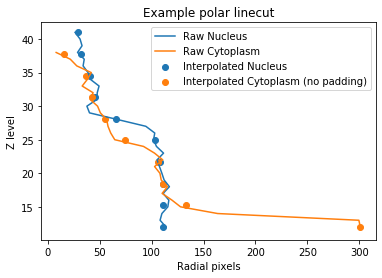

In [452]:
# Do the relatively easy things first:
# d Smooth the lines in log-space and re-plot
# . Generate 10 layers for both types, but make them non-decreasing
# . Adjust cytoplasm in real-coordinates to have >15um buffer

all_levs = list(sorted(set(nuc_padded.keys()).union(cyto_padded.keys())))
lp = np.linspace(all_levs[0], all_levs[-1], 10)

levs = sorted(nuc_padded.keys())

x = np.array([nuc_padded[lev][0][PL] - recentering[0] for lev in levs])
y = np.array([nuc_padded[lev][1][PL] - recentering[1] for lev in levs])
#     plt.plot(x,y)

lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)
guide_l, guide_r = levsp, rpp

plt.scatter(rpp,levsp)
plt.plot(np.sqrt(x**2 + y**2),levs)
#     plt.xscale('log')

levs = sorted(cyto_padded.keys())    
x = np.array([cyto_padded[lev][0][PL] - recentering[0] for lev in levs])
y = np.array([cyto_padded[lev][1][PL] - recentering[1] for lev in levs])

lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)
plt.scatter(rpp,levsp)
plt.plot(np.sqrt(x**2 + y**2),levs)
plt.title('Example polar linecut')
plt.legend(['Raw Nucleus','Raw Cytoplasm','Interpolated Nucleus','Interpolated Cytoplasm (no padding)'])
plt.xlabel('Radial pixels')
plt.ylabel('Z level')
#     plt.xscale('log')


27 27
[12.         14.88888889 17.77777778 20.66666667 23.55555556 26.44444444
 29.33333333 32.22222222 35.11111111 38.        ]


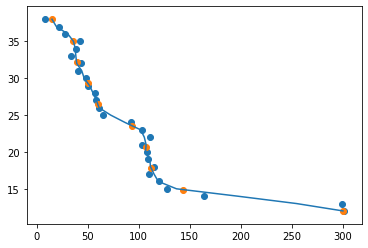

In [377]:
def smoothed(r, w=3, use_log=False):
    
    if use_log: r = np.log(r)
    res = np.convolve(r, np.ones(w), 'same') / np.convolve(r*0+1, np.ones(w),'same')
    if use_log: res = np.exp(res)
    
    return res

r0 = np.sqrt(x**2 + y**2)
rp = smoothed(np.sqrt(x**2 + y**2), use_log=False)
print(len(r0), len(rp))
plt.plot(rp,levs)
plt.scatter(r0,levs)

# need to provide levs because we have to render to a common level
def make10_nondec(r, levs, n=10, lp=None, do_smooth=True, nondec=True, minmax='min', trim=True, guide=None):
    
    # make interpolation of r using levs

    if lp is None: 
        lp = np.linspace(levs[0], levs[-1],10)

    if do_smooth: r = smoothed(r)
    
    rp = np.interp(lp, levs, r, left=None, right=None)
    
    if nondec: 
        rp = np.minimum.accumulate(rp) if minmax == 'min' else np.maximum.accumulate(rp)
        
    return lp, rp

levsp, rpp = make10_nondec(r0, levs, do_smooth=True)
plt.scatter(rpp,levsp)
print(levsp)

In [347]:
0.03237/sf

0.07285744510047523

In [ ]:
# remaining to do:
# . Bulge the cytoplasm
#   . At the end of production
#   . Compare every guide point with every cyto point
#   . If breaks rules, compute additions 1um at a time until over rules
# . Re-plot for comparison
# . Cap arbitrarily
# . Export arbitrarily, without decimation

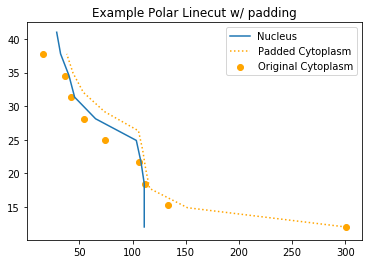

In [528]:
def bulge(r1,z1,r2,z2,scaling=(0.07285744510047523, 0.07285744510047523, 0.1), bb=.020, debug=False):

    newz, newr = [], []

    zgi = np.linspace(min(z2), max(z2),101)
    rgi = np.interp(zgi, z2,r2)
    
    zoi = np.linspace(min(z1), max(z1), 101)
    roi = np.interp(zoi, z1, r1)
    
#     for z, r in zip(z1,r1): # for each outer point, displaced by rp
    for z, r in zip(zoi,roi): # for each outer point, displaced by rp
        rp = 0
        
        # consider the distance with each of the guide points (zg, rg)
#         dist = np.array([np.sqrt((r+rp-rg)**2*scaling[0]**2+(z-zg)**2*scaling[-1]**2) for zg,rg in zip(z2,r2)])
        dist = np.array([np.sqrt((r+rp-rg)**2*scaling[0]**2+(z-zg)**2*scaling[-1]**2) for zg,rg in zip(zgi,rgi)])
        ginterpdr = np.interp([z], z2,r2)[0]
#         ginterpdr = np.interp([z], zgi,rgi)[0]
        
        while(min(dist)<bb or r+rp < ginterpdr):
            rp+=0.25
#             dist = np.array([np.sqrt((r+rp-rg)**2*scaling[0]**2+(z-zg)**2*scaling[-1]**2) for zg,rg in zip(z2,r2)])
            dist = np.array([np.sqrt((r+rp-rg)**2*scaling[0]**2+(z-zg)**2*scaling[-1]**2) for zg,rg in zip(zgi,rgi)])
      
        
        if debug: print(z,r,rp,min(dist))
        
        newz.append(z)
        newr.append(r+rp)
        
    newzi = np.linspace(newz[0], newz[-1], 10)
    newri = np.interp(newzi, newz, newr )
    return newzi, newri
    return newz, newr

zb, rb = bulge(rpp,levsp, guide_r, guide_l, scaling=(0.07285744510047523, 0.07285744510047523, 0.1), bb=.2)


if True:
    plt.plot(guide_r,guide_l)
    plt.scatter(rpp,levsp, color='orange')
    plt.plot(rb, zb, color='orange', linestyle=':')
    plt.title('Example Polar Linecut w/ padding')
    plt.legend(['Nucleus','Padded Cytoplasm','Original Cytoplasm'])
# plt.scatter(rb, zb, color='orange', marker='o')

In [471]:
# The problem with this code is that it ensures cytoplasm and nucleus levels are at same height. 
# But we can't have both that and constant number of levels.

# So: 
# . Use smoothed native levels for nucleus interpolation
# . Pass smoothed native levels (or interpolation itself?) to guide
# . Be prepared to export separate levels for each (upper and lower may not be equal as before; add caps)


# Function that applies monotonicity + bulge
def plot_polar_edited(nuc_padded, cyto_padded, num_polar=20, doPlot=False):
    
    new_nuc = []
    new_cyt = []
    for PL in range(num_polar): # PL are the thetas
        all_levs = list(sorted(set(nuc_padded.keys()).union(cyto_padded.keys())))
        lp = np.linspace(all_levs[0], all_levs[-1], 10)

        levs = sorted(nuc_padded.keys())
        x = np.array([nuc_padded[lev][0][PL] - recentering[0] for lev in levs])
        y = np.array([nuc_padded[lev][1][PL] - recentering[1] for lev in levs])
    #     plt.plot(x,y)

        lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
        levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)
        levspg, rppg = levsp, rpp # save as guide
        new_nuc.append([levsp, rpp])

        if doPlot:
            plt.scatter(rpp,levsp, color='blue')
            plt.plot(np.sqrt(x**2 + y**2),levs, color='blue', linestyle=':')
            print('nuc vals:', rpp,levsp)
    #     plt.xscale('log')

        levs = sorted(cyto_padded.keys())    
        x = np.array([cyto_padded[lev][0][PL] - recentering[0] for lev in levs])
        y = np.array([cyto_padded[lev][1][PL] - recentering[1] for lev in levs])

        lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
        levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lpt, do_smooth=True)

        levspb, rppb = bulge(rpp, levsp, rppg,levspg, bulge=0.02)
        
        new_cyt.append([levspb, rppb])
        
        if doPlot:
            plt.scatter(rpp,levsp, color='red')


            plt.plot(np.sqrt(x**2 + y**2),levs, color='red',linestyle=':')
            plt.plot(rppb, levspb, color='red') #,linestyle=':')

            #     plt.xscale('log')

            plt.xlabel('r')
            plt.ylabel('z')
            plt.show()
    
    new_nuc = np.array(new_nuc)
    new_cyt = np.array(new_cyt)
    print(new_nuc.shape, new_cyt.shape)
#     print('00:', new_cyt[0][0], new_cyt[:][1][0])
    
#     for n,lev in enumerate(new_nuc[0][0]):
#         print(n,lev, new_nuc[:,1,n])
    
    edited_nuc = {round(lev,3): new_nuc[:,1,n] for n,lev in enumerate(new_nuc[0][0])}
    edited_cyt = {round(lev,3): new_cyt[:,1,n] for n,lev in enumerate(new_cyt[0][0])}
#     print(edited_nuc)
    return edited_nuc, edited_cyt
    
_n = deepcopy(nuc_padded)
_c = deepcopy(cyto_padded)
_en, _ec = plot_polar_edited(_n, _c)

for _ in ec:
    

(20, 2, 10) (20, 2, 9)
{12.0: array([107.78463579,  93.58644888,  80.70036845,  69.23504088,
        63.61885484,  69.5038264 ,  82.44286753,  98.83337245,
       113.98373241, 120.69034782, 108.0996383 ,  86.73682962,
        68.12446167,  36.52444295,  38.2186223 ,  71.98321894,
        94.86144117, 108.90449392, 115.33113796, 110.99859491]), 15.222: array([107.78463579,  93.58644888,  80.70036845,  69.23504088,
        63.61885484,  69.5038264 ,  74.25893048,  98.56289352,
       113.98373241, 117.39829347, 108.0996383 ,  82.12811062,
        63.54170036,  36.52444295,  38.2186223 ,  65.83364635,
        94.86144117, 108.90449392, 115.33113796, 110.99859491]), 18.444: array([106.95018328,  93.58644888,  80.70036845,  69.23504088,
        63.61885484,  69.5038264 ,  74.25893048,  98.56289352,
       113.98373241, 117.39829347, 108.0996383 ,  82.12811062,
        63.54170036,  36.52444295,  38.2186223 ,  64.94233232,
        94.86144117, 108.90449392, 114.91932932, 110.99859491]), 21.

nuc vals: [107.78463579 107.78463579 106.95018328 102.43480863 101.1485654
  63.16962273  44.3478527   41.44519144  30.06707367  25.0098968 ] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


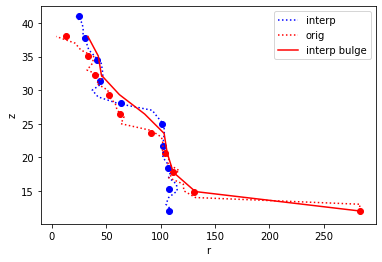

nuc vals: [93.58644888 93.58644888 93.58644888 92.8479382  92.8479382  60.02607429
 45.04990032 39.64129677 25.83938785 20.27027163] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


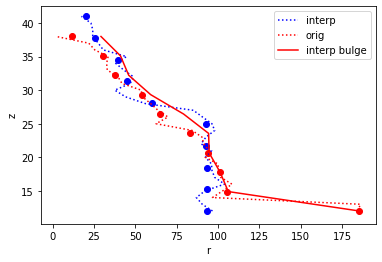

nuc vals: [80.70036845 80.70036845 80.70036845 80.70036845 80.70036845 52.84495925
 44.39376992 34.8934053  24.33812234 20.35584409] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


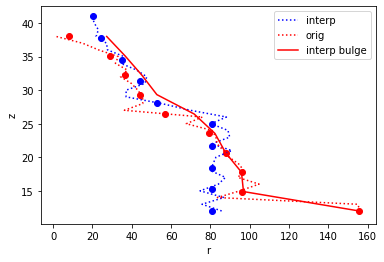

nuc vals: [69.23504088 69.23504088 69.23504088 69.23504088 69.23504088 51.27275225
 42.8587729  31.49026395 24.08180816 23.21795734] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


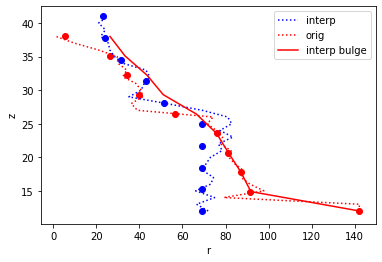

nuc vals: [63.61885484 63.61885484 63.61885484 63.61885484 63.61885484 53.65092298
 42.46770465 30.47802397 26.10250429 24.15144485] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


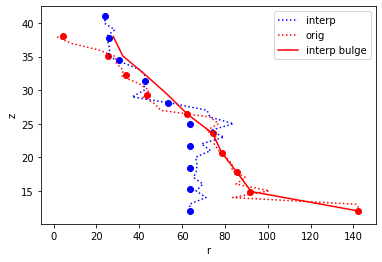

nuc vals: [69.5038264  69.5038264  69.5038264  69.5038264  69.5038264  57.84946189
 46.52209083 32.94793485 29.36515151 22.97099944] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


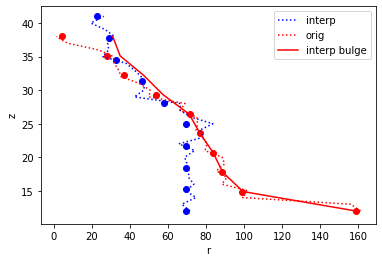

nuc vals: [82.44286753 74.25893048 74.25893048 74.25893048 74.25893048 65.15481213
 58.19576925 42.04356627 30.96092673 20.82556826] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


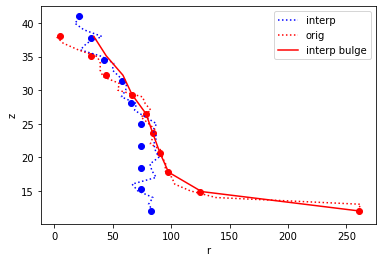

nuc vals: [98.83337245 98.56289352 98.56289352 98.56289352 96.18540714 73.55564552
 69.18597999 49.84510533 28.90237204 21.02702474] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


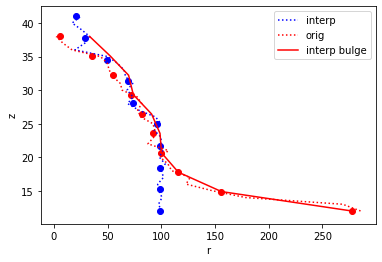

nuc vals: [113.98373241 113.98373241 113.98373241 113.98373241 113.98373241
  89.25924576  76.30568715  53.81553341  29.5654519   23.71296672] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


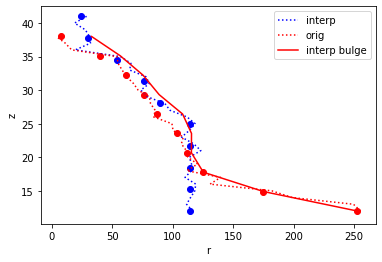

nuc vals: [120.69034782 117.39829347 117.39829347 117.39829347 117.39829347
  97.72341926  84.81808726  56.38963745  33.9748843   30.00627143] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


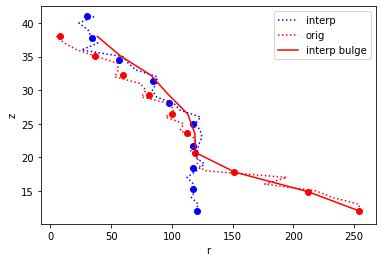

nuc vals: [108.0996383  108.0996383  108.0996383  108.0996383  108.0996383
  93.97381135  79.38943247  60.9047065   41.56957018  26.47794284] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


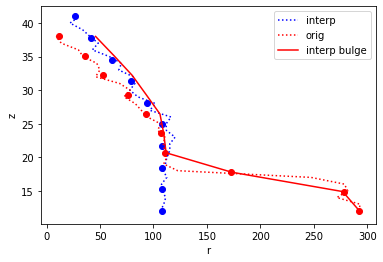

nuc vals: [86.73682962 82.12811062 82.12811062 82.12811062 82.12811062 75.17586641
 67.11173473 54.46571437 43.17489055 21.52441508] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


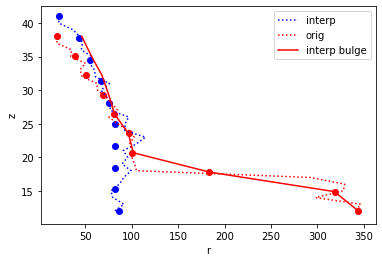

nuc vals: [68.12446167 63.54170036 63.54170036 63.54170036 63.54170036 56.02385233
 56.02385233 47.57173607 34.01036996 20.51216001] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


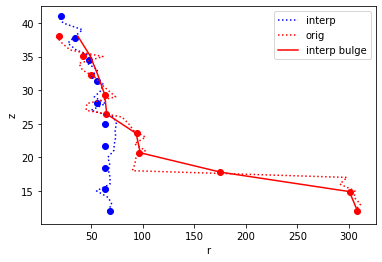

nuc vals: [36.52444295 36.52444295 36.52444295 36.52444295 36.52444295 36.52444295
 36.52444295 36.52444295 24.25808309 22.18970928] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


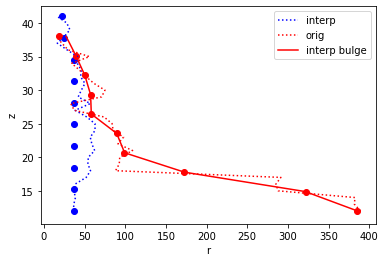

nuc vals: [38.2186223  38.2186223  38.2186223  38.2186223  38.2186223  38.2186223
 38.2186223  36.8753     21.37201022 21.37201022] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


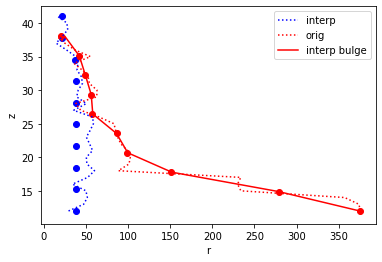

nuc vals: [71.98321894 65.83364635 64.94233232 64.94233232 64.94233232 42.99541582
 42.99541582 38.48789477 22.28561799 22.28561799] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


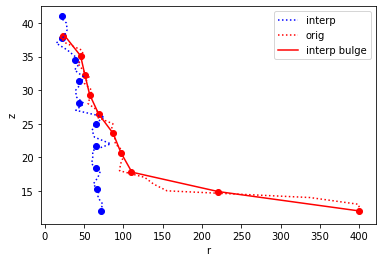

nuc vals: [94.86144117 94.86144117 94.86144117 94.35430325 93.99051072 60.76132535
 48.86748287 41.40484873 32.28159109 27.07861877] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


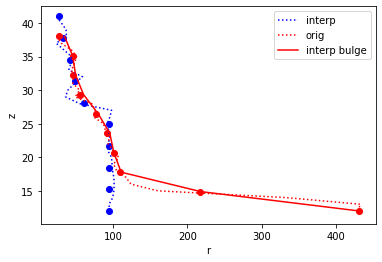

nuc vals: [108.90449392 108.90449392 108.90449392 108.90449392 104.81784895
  61.57890456  47.27044717  45.1775747   41.91032131  35.31246974] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


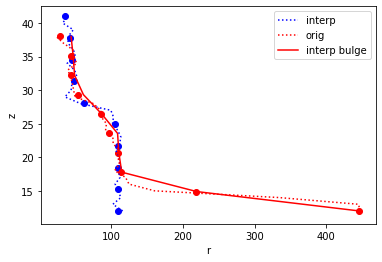

nuc vals: [115.33113796 115.33113796 114.91932932 112.52366386 108.70798359
  65.05867737  47.31669316  40.44890153  37.8276124   35.55141455] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


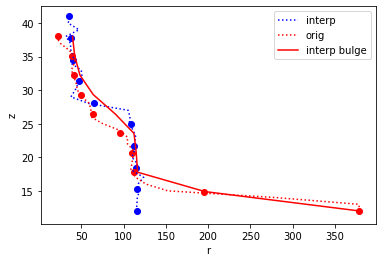

nuc vals: [110.99859491 110.99859491 110.99859491 107.95486181 103.53976403
  65.29243423  45.58888612  40.2658202   32.39938904  28.74738041] [12.         15.22222222 18.44444444 21.66666667 24.88888889 28.11111111
 31.33333333 34.55555556 37.77777778 41.        ]


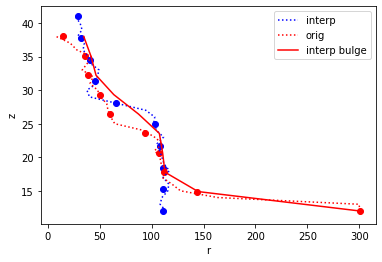

(20, 2, 10) (20, 2, 10)
dict_keys([12.0, 15.222, 18.444, 21.667, 24.889, 28.111, 31.333, 34.556, 37.778, 41.0])
dict_keys([12.0, 14.889, 17.778, 20.667, 23.556, 26.444, 29.333, 32.222, 35.111, 38.0])


In [531]:
# second attempt
# XX recentering not provided?
# current failure: need to interpolate more when bulging
def plot_polar_edited2(nuc_padded, cyto_padded, num_polar=20, doPlot=False, bb=0.02):
    
    new_nuc = []
    new_cyt = []
    for PL in range(num_polar): # PL are the thetas
#         all_levs = list(sorted(set(nuc_padded.keys()).union(cyto_padded.keys())))

        levs = sorted(nuc_padded.keys()) # source levels
        lp = np.linspace(levs[0], levs[-1], 10) # levels to be created

        x = np.array([nuc_padded[lev][0][PL] - recentering[0] for lev in levs])
        y = np.array([nuc_padded[lev][1][PL] - recentering[1] for lev in levs])

#         lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
        levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lp, do_smooth=True)
        levspg, rppg = levsp, rpp # save as guide
        new_nuc.append([levsp, rpp])

        if doPlot:
            plt.scatter(rpp,levsp, color='blue')
            plt.plot(np.sqrt(x**2 + y**2),levs, color='blue', linestyle=':')
            print('nuc vals:', rpp,levsp)
    #     plt.xscale('log')

        levs = sorted(cyto_padded.keys())    
        lp = np.linspace(levs[0], levs[-1], 10) # levels to be created

        x = np.array([cyto_padded[lev][0][PL] - recentering[0] for lev in levs])
        y = np.array([cyto_padded[lev][1][PL] - recentering[1] for lev in levs])

#         lpt = [_ for _ in lp if levs[0] <= _ <= levs[-1] ] # interpolate only at the points inside valid region
        levsp, rpp = make10_nondec(np.sqrt(x**2 + y**2), levs, lp=lp, do_smooth=True)

        levspb, rppb = bulge(rpp, levsp, rppg, levspg, bb=bb)
        
        new_cyt.append([levspb, rppb])
        
        
        if doPlot:
            plt.scatter(rpp,levsp, color='red') # just the interpolated


            plt.plot(np.sqrt(x**2 + y**2),levs, color='red',linestyle=':') # original points
            plt.plot(rppb, levspb, color='red') #,linestyle=':') # bulged

            #     plt.xscale('log')

            plt.xlabel('r')
            plt.ylabel('z')
            
            plt.legend(['interp', 'orig', 'interp bulge'])
            
            plt.show()
    
    new_nuc = np.array(new_nuc)
    new_cyt = np.array(new_cyt)
    print(new_nuc.shape, new_cyt.shape)
#     print('00:', new_cyt[0][0], new_cyt[:][1][0])
    
#     for n,lev in enumerate(new_nuc[0][0]):
#         print(n,lev, new_nuc[:,1,n])
    
    edited_nuc = {round(lev,3): new_nuc[:,1,n] for n,lev in enumerate(new_nuc[0][0])}
    edited_cyt = {round(lev,3): new_cyt[:,1,n] for n,lev in enumerate(new_cyt[0][0])}
#     print(edited_nuc)
    return edited_nuc, edited_cyt
    
_n = deepcopy(nuc_padded)
_c = deepcopy(cyto_padded)
_en, _ec = plot_polar_edited2(_n, _c, doPlot=True, bb=.1)
print(_en.keys())
print(_ec.keys())

# for _ in ec:
    

In [489]:
(0.03237/sf, 0.03237/sf, 0.1)

(0.07285744510047523, 0.07285744510047523, 0.1)